In [3]:
import torch
from torch_geometric.data import Data
import matplotlib.pyplot as plt
import networkx as nx

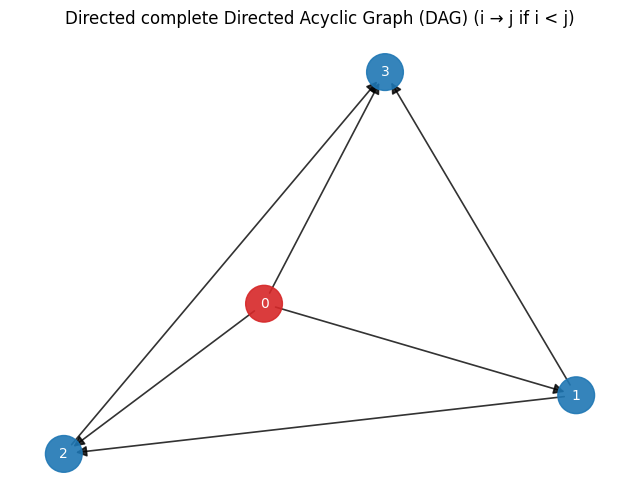

In [6]:
def make_directed_complete_forward_graph(embeddings):
    """
    embeddings: [N, 512]
    returns a directed complete graph (acyclic): edges from i -> j only if i < j
    """
    x = embeddings
    N = x.size(0)

    src_list = []
    dst_list = []

    for i in range(N):
        for j in range(i + 1, N):
            src_list.append(i)
            dst_list.append(j)

    edge_index = torch.tensor([src_list, dst_list], dtype=torch.long)

    data = Data(x=x, edge_index=edge_index)
    return data

def visualize_pyg_graph(data, layout="spring"):
    """
    data: PyG Data object with edge_index
    layout: "spring", "kamada", or "circular"
    """
    edge_index = data.edge_index

    # Build networkx DiGraph
    G = nx.DiGraph()
    N = data.num_nodes
    G.add_nodes_from(range(N))

    # Add directed edges
    edges = edge_index.t().tolist()  # [[src, dst], ...]
    G.add_edges_from(edges)

    # Choose layout
    if layout == "spring":
        pos = nx.spring_layout(G, seed=42)
    elif layout == "kamada":
        pos = nx.kamada_kawai_layout(G)
    elif layout == "circular":
        pos = nx.circular_layout(G)
    else:
        raise ValueError("Unknown layout")

    plt.figure(figsize=(8, 6))

    # Highlight node 0
    node_colors = ["tab:red"] + ["tab:blue"] * (N - 1)

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, 
                           node_color=node_colors,
                           node_size=700, 
                           alpha=0.9)

    # Draw labels
    nx.draw_networkx_labels(G, pos, font_color="white", font_size=10)

    # Draw directed edges
    nx.draw_networkx_edges(
        G, pos, arrowstyle="-|>", arrowsize=16, width=1.2, alpha=0.8
    )

    plt.title("Directed complete Directed Acyclic Graph (DAG) (i → j if i < j)")
    plt.axis("off")
    plt.show()

# Create example embeddings
N = 4
emb = torch.randn(N, 512)

# Build directed complete DAG
data = make_directed_complete_forward_graph(emb)

# Visualize
visualize_pyg_graph(data, layout="spring")

In [1]:
import torch

In [3]:
a = torch.arange(12)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [7]:
a = a.view(4, -1)
a[1]

tensor([3, 4, 5])